# Statistikk i Python 3

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
np.random.seed(1234)

# I denne delen vil vi fokusere på lineærregresjon.
Helt enkelt, handler det om å finne en modell $\hat{y}$ som best beskriver datapunktene. I de tilfellene vi mistenker at dataene er lineære, vil vi tilpasse linjen:
$$\hat{y} = \beta_0 + \beta_1 x.$$
En veldig populær metode, er minste kvadraters metode. Her vil vi minimere summen av kvadrerte avstander mellom datapunktet $y_i$ og det estimerte datapunktet $\hat{y_i}$:

$$\textit{cost} = \sum_{i=1}^{n} (y_i - \hat{y_i})^2.$$ <br>
Vi tenker på dette som en $\textbf{kostfunksjon}$, og vi vil finne det stigningstallet og konstantleddet som gjør at den blir minst mulig. Denne kostfunksjonen kan minimeres ved hjelp av kalkulus, se Squires s. 30. Man partiellderiverer med hensyn på stigningstallet $\beta_1$ og konstantleddet $\beta_0$, for å finne bunnpunktet til kostfunksjonen. Disse løsningene har enkle formler som Python kan bruke.

## Linear Regression


I dette programmet undersøker vi dataene gitt i tabell 4.2, side 34 i Squires, som ser på sammenhengen mellom temperatur $T$ og motstand $R$ i en silikonprøve. I følge teorien som Squires presenterer på side 33, er forholdet gitt ved 

$$R = R_0 e^{T_0/T}.$$

Dette er ikke lineært, men ved å log-transformere ligningen 

$$lnR =T_0/T + lnR_0 ,$$

vil forholdet mellom $x = \frac{1}{T}$ og $y = lnR$ bli lineært og vi kan jobbe videre med disse transformerte variablene. 




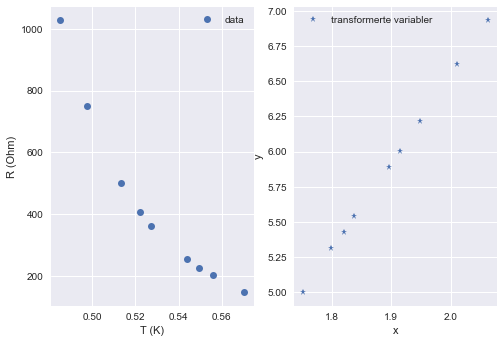

In [38]:
#data hentet fra Table 4.2 side 34. Squires
T = np.array([570.6, 555.9, 549.4, 544.1, 527.3, 522.2, 513.1, 497.6, 484.9])/1000 #temperatur i K
R = np.array([148.1, 202.6, 227.1, 255.1, 362.0, 406.1, 502.5, 750.1, 1026.7]) #motstand i Ohm

#transformerer data for å få lineær sammenheng
x = 1/T
y = np.log(R)


plt.style.use("seaborn")
plt.subplot(1,2,1)
plt.plot(T,R,"o",label="data")
plt.xlabel('T (K)')
plt.ylabel('R (Ohm)')
plt.legend()
plt.subplot(1,2,2)
plt.plot(x,y,"*",label="transformerte variabler")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Her ser vi tydelig at dataene blir lineære når vi har transformert dem. 
Vi vil nå benytte minste kvadraters metode for å finne en modell som passer og bruker funksjonen linregress fra stats pakken til scipy.

Linregress returnerer:

    LinregressResult(slope=6.22827923445122, intercept=-5.910297159240161, rvalue=0.9998679481548884, pvalue=8.71137976427864e-14, stderr=0.03826038230685759, intercept_stderr=0.0725401430250171)

Stderr gir standard error i stigningstallet (slope), og intercept_stderr gir standard error i konstantleddet (intercept). rvalue gir korrelasjonskoeffisienten som kan kvadreres ($R^2$) for å gi et mål på hvor godt modellen beskriver dataene (se kompendiet).  

In [39]:
Y = stats.linregress(x,y)

Nå har vi estimert stigningstall og konstantledd med standardfeil for modellen $$\hat{y} = \beta_0 + \beta_1 x$$ Vi ekstrapolerer en linje, og se hvor godt modellen passer, samt ser på $R^2$:


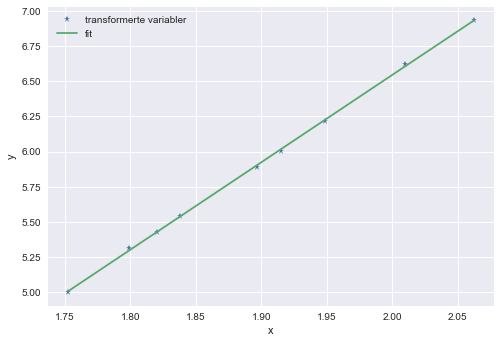

In [40]:
def line(x,m,b): 
    return x*m + b
x_extra = np.linspace(min(x),max(x),100) 
y_extra = line(x_extra,Y.slope,Y.intercept) 

plt.plot(x,y,"*",label="transformerte variabler")
plt.plot(x_extra,y_extra,label="fit")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Her ser vi at modellen treffer svært godt. Vi konkluderer med at forholdet mellom 
 $lnR$ og $\frac{1}{T}$ er lineært og bekrefte det teoretiske forholdet mellom temperatur og resistans.

In [41]:
# Hent ut estimater med 95% konfidensintervall for stigningstall og intercept
# Two-sided inverse Students t-distribution, p - probability, df - degrees of freedom
# Kode fra https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
from scipy.stats import t
alpha = 0.05
tinv = lambda p, df: abs(t.ppf(p/2, df))
ts = tinv(alpha, len(x)-2)

print(f"Stigningstall (95% CI): {Y.slope:.6f} +/- {ts*Y.stderr:.6f}")
print(f"Intercept (95% CI): {Y.intercept:.6f} +/- {ts*Y.intercept_stderr:.6f}")

print(f"R kvadrert: {Y.rvalue**2:.6f}")

Stigningstall (95% CI): 6.228279 +/- 0.090471
Intercept (95% CI): -5.910297 +/- 0.171530
R kvadrert: 0.999736


## Residualer og evaluering av linearitet

I dette programmet ønsker vi å plotte residualene. Residualene er differansen mellom predikerte data, og faktiske data. Vi plotter predikerte data langs x-aksen og residualene langs y-aksen. Hvis modellen er god, bør residualene ikke ha noen trend eller tydelig system, og ligge nær null. 

La oss si at vi ikke kjente til det teoretiske forholdet mellom temperatur og resistans i eksempelet over og gjorde en første utforskende lineær tilpasning til de utransformerte variablene $T$ og $R$. 

R kvadrert: 0.900123


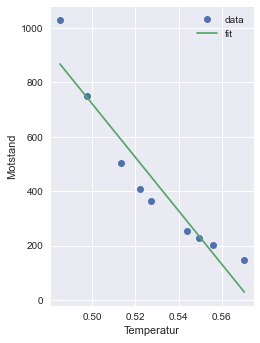

In [42]:
Y_raw = stats.linregress(T,R)
x_raw = np.linspace(min(T),max(T),100)
y_raw = line(x_raw,Y_raw.slope,Y_raw.intercept) 

plt.subplot(121)
plt.plot(T,R,"o",label="data")
plt.plot(x_raw,y_raw,label="fit")
plt.xlabel("Temperatur")
plt.ylabel("Motstand")
plt.legend()

print(f"R kvadrert: {Y_raw.rvalue**2:.6f}")

Rent visuelt kan man med litt godvilje tenke at en lineær modell ikke er så gal. $R^2$ er også relativt høy. La oss dog se hva residualplottet forteller oss.

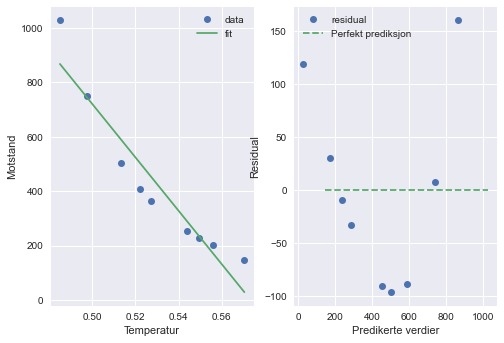

In [43]:
Y_raw = stats.linregress(T,R)
x_raw = np.linspace(min(T),max(T),100)
y_raw = line(x_raw,Y_raw.slope,Y_raw.intercept) 

plt.subplot(121)
plt.plot(T,R,"o",label="data")
plt.plot(x_raw,y_raw,label="fit")
plt.xlabel("Temperatur")
plt.ylabel("Motstand")
plt.legend()

predicted = np.polyval([Y_raw.slope,Y_raw.intercept],T)
residual = R - predicted

plt.subplot(122)
plt.plot(predicted,residual,"o",label = "residual")
plt.plot(R,np.zeros(len(x)),"--",label = "Perfekt prediksjon")
plt.xlabel("Predikerte verdier")
plt.ylabel("Residual")

plt.legend()
plt.show()

I dette tilfellet ser vi tydelig systematisk avvik fra den stiplede linjen, som representerer sammenfall mellom de predikerte verdiene og datapunktene: en lineær modell passer altså ikke så godt til de utransformerte dataene, og det kommer ennå tydeligere frem i residualplottet.

La oss se hva som skjer dersom vi lager det samme residualplottet for de transformerte dataene.

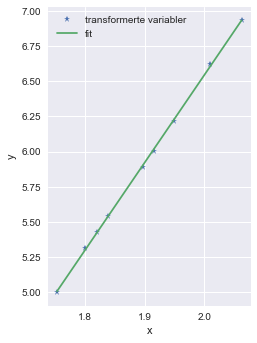

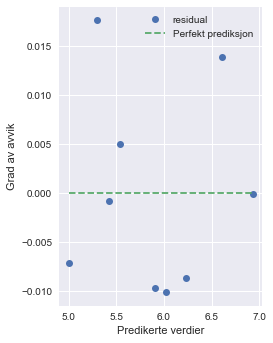

In [44]:
predicted = line(x,Y.slope,Y.intercept)
residual = y - predicted

plt.subplot(1,2,1)
plt.plot(x,y,"*",label="transformerte variabler")
plt.plot(x_extra,y_extra,label="fit")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

plt.subplot(1,2,2)
plt.plot(predicted,residual,"o",label = "residual")
plt.plot(y,np.zeros(len(x)),"--",label = "Perfekt prediksjon")
plt.xlabel("Predikerte verdier")
plt.ylabel("Grad av avvik")

plt.legend()
plt.show()

Vi observerer avvik nær null (<1%), og heller intet system i spredningen av residualene. Vi kan derfor igjen bekrefte at en lineær modell er passende for de transformerte dataene. 